## 本文件用于将CTSRD数据集里的图片裁剪成仅剩交通标志  
旧代码，部分内容需要修改后才可使用

[链接：CTSRD数据集](http://www.nlpr.ia.ac.cn/pal/trafficdata/recognition.html)  
[链接：其它国内的交通标志数据集](https://blog.csdn.net/weixin_42419002/article/details/100605115)

---

In [48]:
import pandas as pd
import numpy as np 
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [30]:
df = pd.read_csv('./dataset/TsignRecgTrain4170Annotation.csv', header=None)
df

,0,1,2,3,4,5,6,7
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0
...,...,...,...,...,...,...,...,...
4165,056_1_0050.png,106,107,15,23,89,87,56
4166,056_1_0051.png,148,147,20,33,123,122,56
4167,056_1_0052.png,218,182,32,26,185,161,56
4168,056_1_0053.png,100,101,12,18,88,85,56


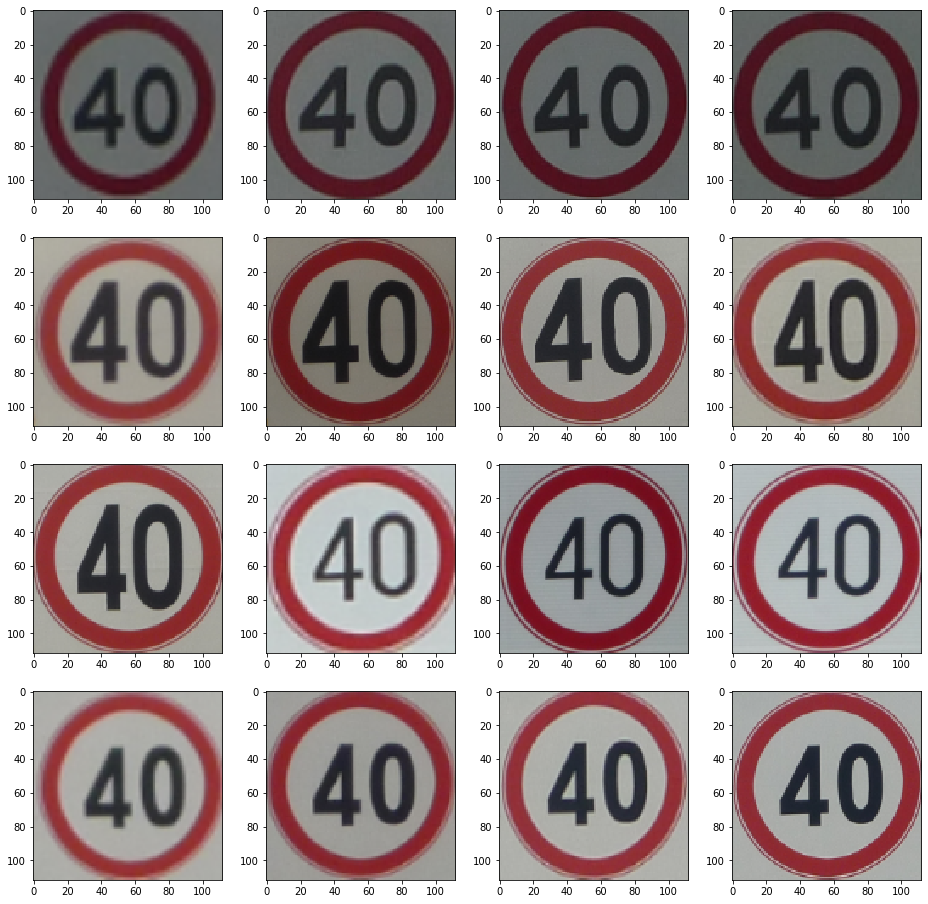

In [44]:
path = './dataset/ctsrd_train/'

plt.figure(figsize=(16,16))
for i in range(123,123+16):
    plt.subplot(4,4,i-122)
    img = cv2.imread(path + df.loc[i][0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img[df.loc[i][4]: df.loc[i][6], df.loc[i][3]: df.loc[i][5]]
    img = cv2.resize(img,(112,112))
    plt.imshow(img)

In [50]:
path_train0 = './dataset/ctsrd_train/'
path_train1 = './dataset/train/'
df = pd.read_csv('./dataset/TsignRecgTrain4170Annotation.csv', header=None)
for i in tqdm(range(len(df))):
    img = cv2.imread(path_train0 + df.loc[i][0])
    img = img[df.loc[i][4]: df.loc[i][6], df.loc[i][3]: df.loc[i][5]]
    img = cv2.resize(img,(112,112))
    cv2.imwrite(path_train1 + df.loc[i][0],img)
    
path_test0 = './dataset/ctsrd_test/'
path_test1 = './dataset/test/'
df = pd.read_csv('./dataset/TsignRecgTest1994Annotation.csv', header=None)
for i in tqdm(range(len(df))):
    img = cv2.imread(path_test0 + df.loc[i][0])
    img = img[df.loc[i][4]: df.loc[i][6], df.loc[i][3]: df.loc[i][5]]
    img = cv2.resize(img,(112,112))
    cv2.imwrite(path_test1 + df.loc[i][0],img)

100%|█████████████████████████████████████████████████████████████████████████████| 1994/1994 [00:12<00:00, 164.64it/s]
